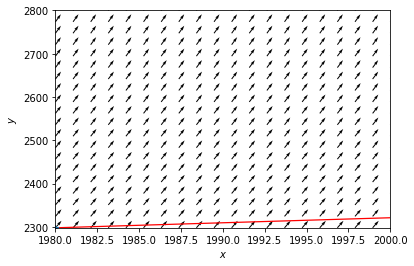

In [5]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (x[0]*x[1])/((x[0]**2) +1)    ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=100; dt=0.001;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[1980,2298]]
color=['r']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(1980,2000,20),np.linspace(2298,2800,20) )

V = (X*Y)/((X**2) +1)  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
ts = np.linspace(1980,2000,20)
P0 = 2298
P_exact = P0*(np.sqrt(((ts-1980)**2) +1))
plt.plot(ts, P_exact,"*")


##Limits of the graph
plt.xlim([1980,2000])
plt.ylim([2298,2800])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

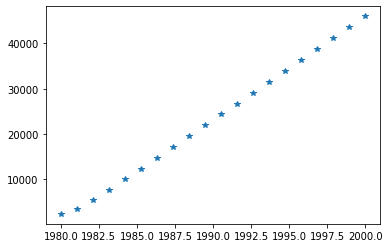

In [6]:
ts = np.linspace(1980,2000,20)
P0 = 2298
P_exact = P0*(np.sqrt(((ts-1980)**2) +1))
plt.plot(ts, P_exact,"*")